In [59]:
#importo las librerias con las q trabajaré en el notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
#cargo el csv con los datos preprocesados

df20 = pd.read_csv('./datos/datos2020.csv', parse_dates=['fecha'])
df20.dropna(subset=['id'], inplace=True)

In [100]:
#revisión de completitud, tipo y memoria del dataframe
df20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163393 entries, 0 to 163393
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                163393 non-null  object        
 1   fecha             163393 non-null  datetime64[ns]
 2   codigo_localidad  163393 non-null  float64       
 3   nombre_localidad  163393 non-null  object        
 4   edad              163393 non-null  object        
 5   unidad_edad       163373 non-null  object        
 6   genero            163393 non-null  object        
 7   red               163393 non-null  object        
 8   tipo_incidente    163393 non-null  object        
 9   prioridad         163393 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 13.7+ MB


**Se evidencia...**

A priori todas las columnas parecen tener datos no nulos, a excepcion de la columna de edad. El plan para revisar los datos será el siguiente:

**1.** Revisar que los *codigo_de_localidad* apunten a un solo *nombre_localidad*. Si se presenta duplicidad de nombre, se ajustará para que cumpla con la condición 1:1

**2.** Revisar el atributo de *edad*, hacer tratamiento a nulos y lograr que la columna sea de tipo int para mejorar el posterior analisis

**3.** Revisar la variable *unidad_edad*, evaluando las diferentes categorias y rectificando si vale la pena tener esta columna

**4.** Llevar el atributo de *genero* como una variable categorica de limitadas opciones 

**5.** Para las variables *red*, *tipo_incidente* y *prioridad* se revisará convertirse en variables categoricas sin tener duplicidad de una misma a causa de errores ortograficos o derivados

In [103]:
#Se procede a ver el cruce de nombre_localidad y su codigo_localidad en una tabla cruzada
df20['codigo_localidad'] = df20['codigo_localidad'].astype(int)
pd.crosstab(df20['nombre_localidad'], df20['codigo_localidad']).head(50)

codigo_localidad,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
nombre_localidad,,,,,,,,,,,,,,,,,,,,
Antonio Nariño,0,0,0,0,0,0,0,0,0,0,0,0,0,0,558,0,0,0,0,0
Barrios Unidos,0,0,0,0,0,0,0,0,0,0,0,1254,0,0,0,0,0,0,0,0
Bosa,0,0,0,0,0,0,4203,0,0,0,0,0,0,0,0,0,0,0,0,0
Chapinero,0,758,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ciudad Bolívar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2058,0
Engativ,0,0,0,0,0,0,0,0,0,1270,0,0,0,0,0,0,0,0,0,0
Engativá,0,0,0,0,0,0,0,0,0,1464,0,0,0,0,0,0,0,0,0,0
Fontib¢n,0,0,0,0,0,0,0,0,599,0,0,0,0,0,0,0,0,0,0,0
Fontibón,0,0,0,0,0,0,0,0,1504,0,0,0,0,0,0,0,0,0,0,0


In [113]:
#Creo un diccionario con un solo nombre para poder reemplazar la columna del nombre de localidad
localidad_dicc = {1 : 'Usaquen', 
                  2 : 'Chapinero',
                  3 : 'Santa Fe',
                  4 : 'San Cristobal',
                  5 : 'Usme',
                  6 : 'Tunjuelito',
                  7 : 'Bosa',
                  8 : 'Kennedy',
                  9 : 'Fontibon',
                  10 : 'Engativa',
                  11 : 'Suba',
                  12 : 'Barrios Unidos',
                  13 : 'Teusaquillo',
                  14 : 'Los Martires',
                  15 : 'Antonio Nariño',
                  16 : 'Puente Aranda',
                  17 : 'La Candelaria',
                  18 : 'Rafael Uribe Uribe',
                  19 : 'Ciudad Bolivar',
                  20 : 'Sumapaz'}

In [116]:
df20['nombre_localidad'] = df20['codigo_localidad'].apply(lambda x: localidad_dicc.get(x))
df20['nombre_localidad'].value_counts()

***Ya se garantiza que no hay varios nombres para un mismo codigo de localidad***

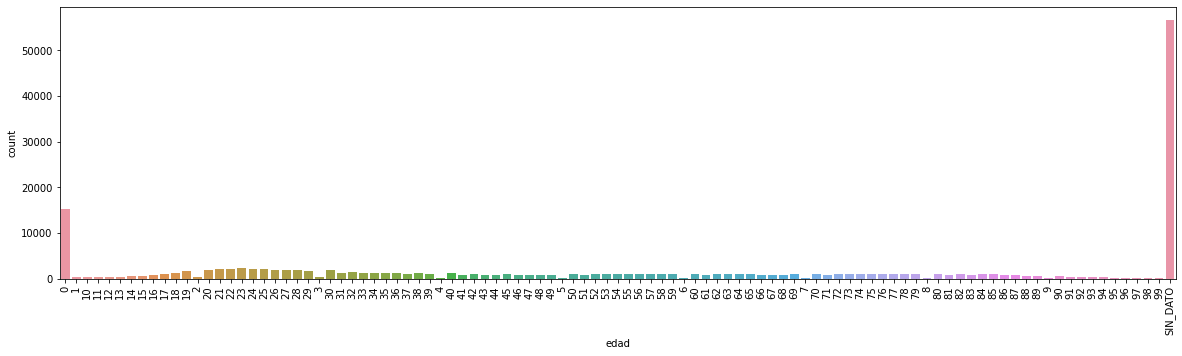

In [163]:
plt.figure(figsize=(20,5))
sns.countplot(x=df20['edad'].sort_values())
plt.xticks(rotation = 90)

plt.show()

*Al revisar la cantidad de registros para cada valor distinto de **Edad** se evidencia que no seria correcto borrar todos los registros "SIN_DATO" porque nos quedariamos sin la mayoría de los registros. 

Igualmente se observa que el valor 0 tiene particularmente un valor alto, lo que puede llevar a pensar q tambien es una manera de marcar la ausencia de dato de edad *